In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Importing data from a csv and analysing it

In [2]:
data = pd.read_csv("csv/Mall_Customers_Clean.csv")

In [3]:
data.describe()

,Unnamed: 0,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,38.850000,60.560000,50.200000
std,57.879185,57.879185,13.969007,26.264721,25.823522
min,0.000000,1.000000,18.000000,15.000000,1.000000
25%,49.750000,50.750000,28.750000,41.500000,34.750000
50%,99.500000,100.500000,36.000000,61.500000,50.000000
75%,149.250000,150.250000,49.000000,78.000000,73.000000
max,199.000000,200.000000,70.000000,137.000000,99.000000


### Making an analysis for each feature

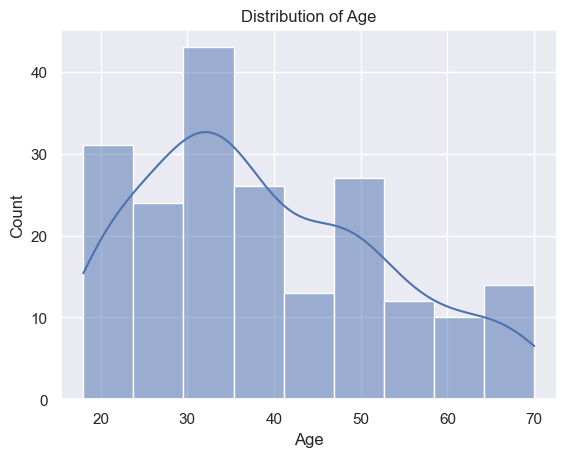

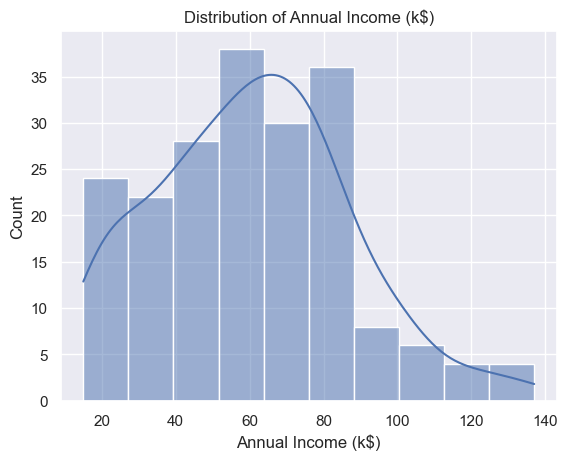

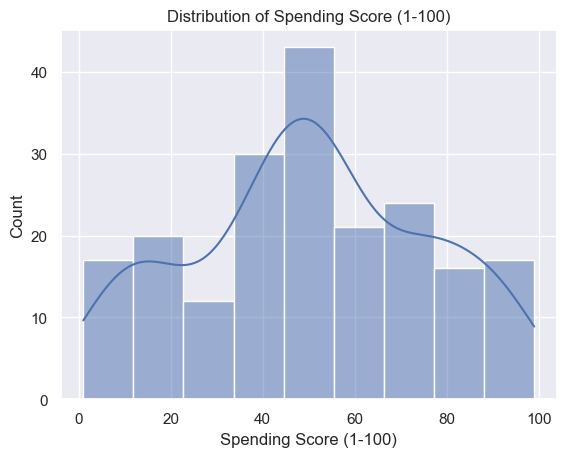

In [4]:
features = ['Age','Annual Income (k$)','Spending Score (1-100)']
for feature in features:
    sns.histplot(data[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

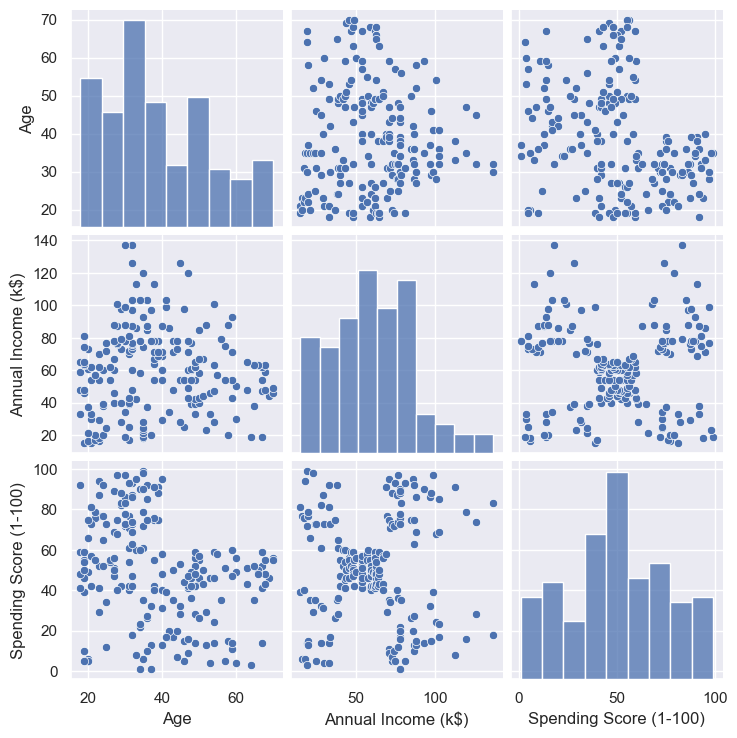

In [5]:
sns.pairplot(data[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

### Scaling a data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
columns_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)']
scaler = StandardScaler()

In [8]:
scaled_data = scaler.fit_transform(data[columns_to_scale])

In [9]:
scaled_data = pd.DataFrame(scaled_data,columns=columns_to_scale)

### Looking for a better amount of clusters

In [10]:
from sklearn.cluster import KMeans

c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

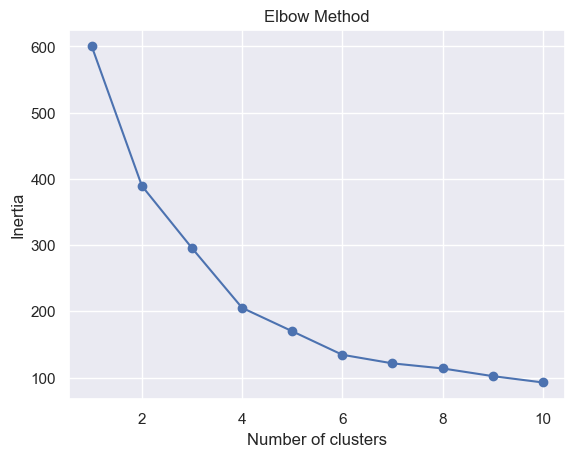

In [11]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Elbow method shows us that 4 clusters is fine

In [12]:
from sklearn.metrics import silhouette_score

c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

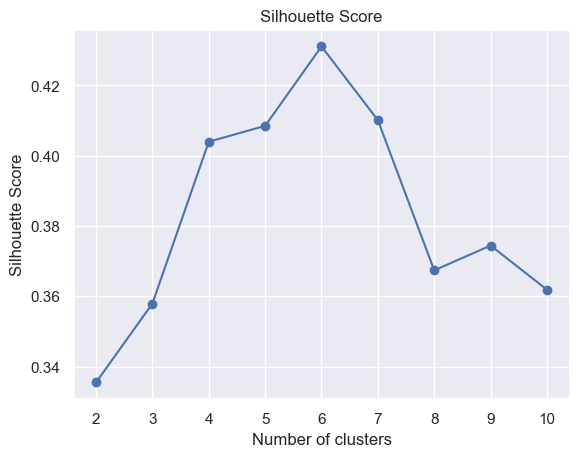

In [13]:
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data,labels))

plt.plot(range(2,11),silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette score is showing us that best amount of clusters is 6